- 回归问题： 目标值是连续值
  - 预测房价
  - 销售额的预测
  - 设定贷款额度
- 线性回归在生活中的映射：【预测学生的期末成绩】
  - 期末成绩的制定：0.7*考试成绩+0.3*平时成绩
    - 特征值为考试成绩和平时成绩
    - 目标值：总成绩
 #### 每一个特征需要有一个权重占比

In [1]:
#现有一组售房数据
import numpy as np
import pandas
from pandas import DataFrame
import matplotlib.pylab as plt
dic = {
    '面积':[50,76,80,100,120,150],
    '售价':[110,152,160,200,240,300]
}
df = DataFrame(data=dic)
df

,面积,售价
0,50,110
1,76,152
2,80,160
3,100,200
4,120,240
5,150,300


Text(0.5, 1.0, '面积和售价分布图')

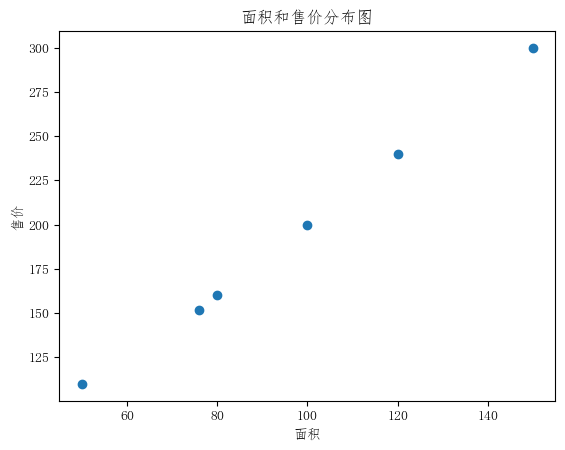

In [2]:
#展示售房数据的分布情况
plt.rcParams['font.sans-serif']=['FangSong']#指定默认字体
plt.rcParams['axes.unicode_minus']=False#解决图像保存是“-”显示为方块的问题

plt.scatter(df['面积'],df['售价'])
plt.xlabel('面积')
plt.ylabel('售价')
plt.title('面积和售价分布图')

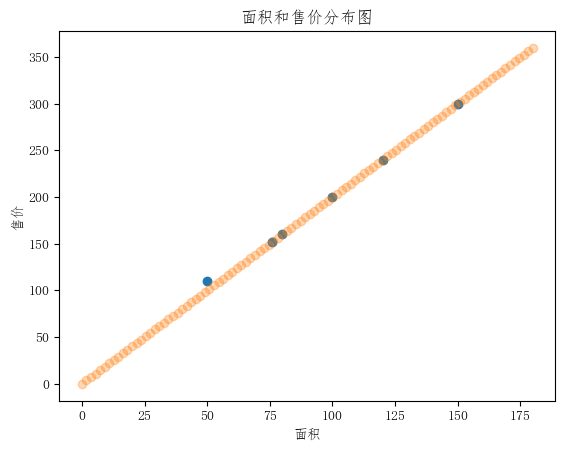

In [3]:
plt.scatter(df['面积'],df['售价'])
plt.xlabel('面积')
plt.ylabel('售价')
plt.title('面积和售价分布图')
plt.scatter(np.linspace(0,180,num=100),np.linspace(0,180,num=100)*2,alpha=0.3)

### 标准线性关系模型
$y = (w_1* x_1 + w_2 * x_2 +···+ w_n* x_n) + b$
  - w: 权重
  - b:可以写为$w_0 * x_0 , x_0 =1$
    - $y = w_0 * x_0+ w_1* x_1 + w_2 * x_2 +···+ w_n * x_n$
  - 权重向量（行向量）：$ w_0 ， w_1， w_2 ，··· w_n$
    - 行向量是一个n*1的矩阵
    <br>
 - 写成矩阵形式：
 $$
X =  \begin{bmatrix}
 1&x_1^1&x_1^2&···&x_1^n\\
 1&x_2^1&x_2^2&···&x_2^n\\
 ···&···&···&···&···\\
 1&x_m^1&x_m^2&···&x_m^n\\
 \end{bmatrix}
Y =  \begin{bmatrix}
 y_1\\
 y_2\\
 ···\\
 y_n\\
 \end{bmatrix}
 $$
 
- 权重也可以写成矩阵形式：
 $$
W = \begin{bmatrix}
w_0&w_1&w_2&···&w_n
\end{bmatrix}
 $$
- 简写为：$Y = XW^T$

- 损失函数
$$
\begin{align}
J(\theta) =& (h_w(x_1)-y_1)^2 + (h_w(x_1)-y_1)^2 +···+ (h_w(x_m)-y_m)^2 \\
       =& \sum_{i=1}^m((h_w(x_i)-y_i)^2 )
\end{align}
$$

- 也可以写作：
$$
\sum_{i=1}^m(y_i-\hat{y}_i)^2 = \sum_{i=1}^m(y_i-X_{i}w)^2 
$$

### L2 范式
$$
dist(X,Y) = \sqrt{\sum_{i=1}^n(x_i - y_i)^2}\\
\|\\
\underset{w}{min}\|y-Xw\|_2
$$
#### 转化为
$$
{\underset{w}{min}\|y-Xw\|_2}^2
$$

#### SSE&RSS
- L2范式开方就是损失函数，称为RSS或者SSE
- SSE 误差平方和 Sum of Squared Error
- RSS 残差平方和 Residual Sum of Squares

#### 最小二乘法
- 通过最小化真实值和预测值之间的RSS来求解问题
- 1.求解一阶导数，并让一阶导数等于0 。在残差平方和RSS上对参数向量w（列向量，矩阵）求导
- 2.将L2范式拆开：
$$
\begin{align}
\frac{\partial RSS}{\partial w} =& \frac{\partial {\|y-Xw\|_2}^2}{\partial w}\\
=& \frac{\partial (y-Xw)^T (y-Xw)}{\partial w}
\end{align}
$$

- 3. 处理转置乘法和减法：

$$
\begin{align}
\because (A-B)^T =& A^T- B^T并且 （AB）^T = B^T * A^T\\
\therefore \frac{\partial RSS}{\partial w} =& \frac{\partial (y^T-w^TX^T) (y-Xw)}{\partial w}\\
化简后 =& \frac{\partial y^Ty - \partial w^TX^Ty - \partial y^TXw + \partial w^TX^TXw }{\partial w}\\
矩阵求导后 =& X^TXw - X^Ty
\end{align}
$$

- 4.令一阶导数为0，求出最小误差下的w值
$$
\begin{align}
 X^TXw - X^Ty =& 0\\
 X^TXw =& X^Ty\\
 左乘一个（X^TX）^{-1}\\
 w = (X^TX)^{-1}X^Ty
\end{align}
$$

### 矩阵求导
- a为常数项，A为矩阵
$$
\frac{\partial a}{\partial A} = 0 , \frac{\partial A^TB^TC}{\partial A} =  B^TC , \frac{\partial C^TBA}{\partial A} = B^TC , \frac{\partial A^TBA}{\partial A} = (B + B^T)A
$$

- API 
  - 最小二乘 ：from sklearn.linear_model import LinearRegression
- 参数：
  - fit_intercept：默认Ture 计算截距
  - normalize: 默认为False。True：特征矩阵在进入回归之前将会被减去均值并除以L2范式（缩放）.如果希望进行标准化，在fit数据之前使用preprocessing模块中的标准化专用类StandardScaler
  - copy_X : 默认Ture，不会覆盖原始数据

- 特征介绍 
  - AveBedrms：
  - Population：街区人口
  - AveOccup：平均入住率
  - Latitude：街区的维度
  - Longitude：街区的经度
  - Medlnc：街区住户收入的中位数
  - HouseAge：房屋使用年数的中位数
  - AveRooms： 街区平均房屋数量

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing as fch #加州房屋价值数据集

In [5]:
fch()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
feature = fch().data
target = fch().target

In [7]:
feature.shape


(20640, 8)

In [8]:
target.shape

(20640,)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.1,random_state=2020)

In [10]:
linner = LinearRegression()

In [11]:
linner.fit(x_train,y_train)

LinearRegression()

In [12]:
linner.coef_ #返回的是w系数

array([ 4.38210243e-01,  9.66229111e-03, -1.08329143e-01,  6.52754576e-01,
       -4.79939625e-06, -3.60231961e-03, -4.21938498e-01, -4.34993681e-01])

In [13]:
linner.intercept_ #截距

-36.99211044654075

In [14]:
#将系数和特征名称结合在一起查看
[*zip(fch().feature_names,linner.coef_)]

[('MedInc', 0.43821024319384183),
 ('HouseAge', 0.009662291107341254),
 ('AveRooms', -0.10832914332769152),
 ('AveBedrms', 0.6527545761249713),
 ('Population', -4.799396252171778e-06),
 ('AveOccup', -0.0036023196063081687),
 ('Latitude', -0.4219384975643337),
 ('Longitude', -0.4349936810644247)]

### 是否预测到正确的数值
- 均方误差MSE 衡量预测值和真实值的差异
$$ 
MSE = \frac{1}{m}\sum_{i=1}^m (y_i-\hat{y_i})^2
$$
- 在sklearn中两种评估指标：
  - 一种是使用sklearn专用的模型评估模块metrics里的类mean_squared_error
  - 调用交叉验证的类cross_val_score并使用里面的scoring参数来设置为：neg_mean_squared_error

In [15]:
from sklearn.metrics import mean_squared_error
y_true = y_test
y_pred = linner.predict(x_test)
mean_squared_error(y_true,y_pred)

0.5273022319571897

In [16]:
y_true.max()


5.00001

In [17]:
y_true.min()

0.325

In [18]:
#交叉验证的MSE
from sklearn.model_selection import cross_val_score
cross_val_score(linner,x_train,y_train,cv=5,scoring='neg_mean_squared_error').mean()

-0.5312602263524756

#### 绝对误差（了解）
- MAE （Mean absolute error)
$$
MAE = \frac{1}{m}\sum_{i=0}^{m-1}\mid y_i-\hat{y_i}\mid
$$
- 调用MAE
  - from sklearn.metrics import mean_absolute_error
  - scoring = "neg_mean_absolute_error"

$$
R^2 = 1 -\frac{\sum_{i=0}^m(y_i-\hat{y})}{\sum_{i=0}^m(y_i-\bar{y_i})^2}=1-\frac{RSS}{\sum_{i=0}^m(y_i-\bar{y})^2}
$$

####  $R^2$ 越接近1越好

- 分子为模型的损失误差
- 可以使用三种方式来调用
  - 1.直接从metrics中导入r2_score,输入预测和真实值后打分
  - 2.直接从线性回归LinearRegression的接口score来进行调用
  - 3.是在交叉验证中，输入"r2"来调用

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test,linner.predict(x_test))

0.6097458147785065

In [20]:
r2 = linner.score(x_test,y_test)
r2

0.6097458147785065

In [21]:
cross_val_score(linner,x_train,y_train,cv=10,scoring='r2').mean()

0.6012662971377254

- 绘制拟合图

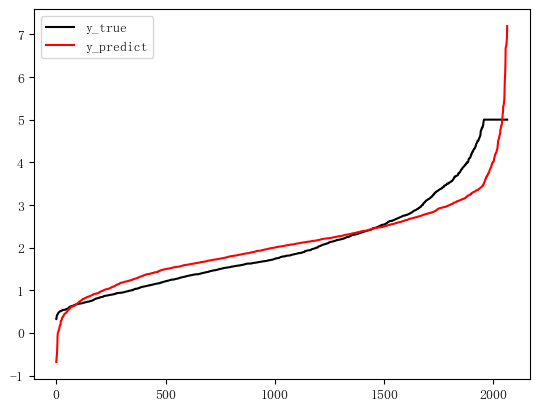

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
y_pred = linner.predict(x_test)
plt.plot(range(len(y_test)),sorted(y_test),c="black",label="y_true")
plt.plot(range(len(y_pred)),sorted(y_pred),c="red",label="y_predict")
plt.legend()
plt.show()

### 实战
- 房地产估价数据集（house.xlse）
  - 数据集信息
    - 房地产估值的市场历史数据集来自台湾新北市新店区。房地产估价是一个回归问题
  - 属性信息：
    - X1 = 交易日期（例如）
    - X2 = 房屋年龄（单位：年）
    - X3 = 到最近的捷运站的距离（单位：米）
    - X4 = 步行生活圈中的便利店的数量（整数）
    - X5 = 地理坐标，纬度
    - X6 = 地理坐标，经度
  - 输出结果如下：
    - Y = 单位面积的房价（10000新台币/Ping，其中Ping是本地单位，1Ping = 3.3平方米）

In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE,r2_score

In [24]:
df = pd.read_csv('./datasets/house.csv')
df.drop(labels = "No",axis = 1,inplace = True)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [25]:
feature = df.loc[:, df.columns != 'Y house price of unit area']
target = df['Y house price of unit area']
feature.shape, target.shape

((414, 6), (414,))

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature, target, random_state=2020, test_size=0.2)


In [27]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [28]:
#模型在测试集的表现

In [29]:
#对模型进行测评
y_true = y_test
y_pred = linear.predict(x_test)
MSE(y_true,y_pred)

55.33810275263129

In [30]:
y_true.max(),y_true.min()

(63.2, 13.8)

In [31]:
r2_score(y_true,y_pred)

0.6107896973474682

In [32]:
#模型在训练集的表现

In [33]:
MSE(y_train,linear.predict(x_train))

83.00583998248578

In [34]:
r2_score(y_train,linear.predict(x_train))

0.5750862960990937

- 结论：训练后的模型在测试机和训练集上表现都不好

In [38]:
from sklearn.preprocessing import PolynomialFeatures
#使用多项式回归
pl = PolynomialFeatures(degree=2)
pl_x_train = pl.fit_transform(x_train)
pl_x_test = pl.fit_transform(x_test)

In [39]:
linear  = LinearRegression()
linear.fit(pl_x_train,y_train)

LinearRegression()

In [40]:
MSE(y_test,linear.predict(pl_x_test))

30.8376609869728

In [41]:
r2_score(y_test,linear.predict(pl_x_test))

0.7831090194854006

- 案例1：
  - 现在有一组天鹅的特征数据然后对模型进行训练，然后模型学习到的内容是有翅膀，嘴巴长的就是天鹅。然后使用模型进行预测，该模型可能会将所有符合这两个特征的动物都预测为天鹅，则肯定会有误差的，因为鹦鹉，秃鹫都符合有翅膀和嘴巴长的特征。
  - 原因：模型学习到的天鹅的特征太少了，导致区分标准太粗糙，不能准确的识别出天鹅。
- 案例2：
  - 更新了样本的特征数据了，增加了一些特征，然后训练模型。模型这次学习到的内容是，有翅膀、嘴巴长、白色、体型像2、脖子长且有弯度的就是天鹅。然后开始使用模型进行预测，现在一组测试数据为鹦鹉，因为鹦鹉的体型小，脖子短不符合天鹅的特征，则预测结果为不是天鹅。然后又有一组特征为黑天鹅，结果因为颜色不是白色，预测成了不是天鹅。
  - 原因：现在模型学习到的特征已经基本可以区分天鹅和其他动物了。但是学习到的特征中有一项是羽毛是白色，那么就会导致将黑天鹅无法识别出来。也就是机器学习到的特征太依赖或者太符合训练数据了。

### 欠拟合&&过拟合
- 欠拟合：案例1中的场景就可以表示欠拟合
  - 一个假设在训练数据上不能获得很好的拟合，但是在训练数据以外的数据集上也不能很好的拟合数据，此时认为这个假设出现了欠拟合的现象。（模型过于简单）
- 过拟合：案例2中的场景就可以表示过拟合
  - 一个假设在训练数据上能够获得比其他假设更好的拟合，但是在训练数据以外的数据集上却不能很好的拟合数据，此时认为这个假设出现了过拟合现象。（模型过于复杂）

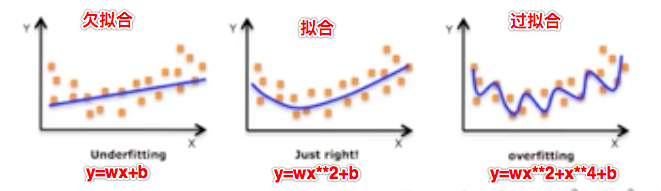

### 欠拟合和过拟合问题的解决
- 欠拟合：
  - 原因：模型学习到样本的特征太少
  - 解决：增加样本的特征数量（多项式回归）
- 过拟合：
  - 原因：原始特征过多，存在一些嘈杂特征。
  - 解决：
     - 进行特征选择，消除关联性大的特征（很难做）
     - 正则化之岭回归（掌握）
### 模型的复杂度--》回归出直线or曲线：
- 我们的回归模型最终回归出的一定是直线吗(y=wx+b)？有没有可能是曲线（非线性）呢（y=wx**2+b）？
  - 我们都知道回归模型算法就是在寻找特征值和目标值之间存在的某种关系，那么这种关系越复杂则表示训练出的模型的复杂度越高，反之越低。
  - 模型的复杂度是由特征和目标之间的关系导致的！特征和目标之间的关系不仅仅是线性关系！
### 欠拟合的处理：多项式回归
- 为了解决欠拟合的情 经常要提高线性的次数（高次多项式）建立模型拟合曲线，次数过高会导致过拟合，次数不够会欠拟合。
    - $y = w*x + b$ 一次多项式函数
    - $y = w_1x^2 + w_2x + b$ 二次多项式函数
    - $y = w_1x^3 + w_2x^2 + w_3*x + b$ 三次多项式函数
    - 。。。
        - 高次多项式函数的表示为曲线
- 相对于线性回归模型y=wx+b只能解决线性(回归出的为直线)问题，多项式回归能够解决非线性回归（回归出的为曲线）问题。
- 拿最简单的线性模型来说，其数学表达式可以表示为：y=wx+b，它表示的是一条直线，而多项式回归则可以表示成：$y=w_1x^2+w_2x+b$,它表示的是二次曲线，实际上，多项式回归可以看成特殊的线性模型，即把$x^2$看成一个特征，把x看成另一个特征，这样就可以表示成$y=w_1z+w_2x+b$,其中$z=x^2$,这样多项式回归实际上就变成线性回归了。
- 其中的$y=w_1x^2+w_2x+b$就是所谓的二次多项式:$ ax^2+bx+c(a≠0).$
- 当然还可以将y=wx+b转为更高次的多项式。是否需要转成更高次的多项式取决于我们想要拟合样本的程度了，更高次的多项式可以更好的拟合我们的样本数据，但是也不是一定的，很可能会造成过拟合。

- 示例
  - 下面模拟 根据蛋糕的直径大小 预测蛋糕价格

In [42]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
#样本的训练数据
x_train = [[6],[8],[10],[14],[18]]#大小
y_train = [[7],[9],[13],[17.5],[18]]#价格
#一次线性回归的学习和预测
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

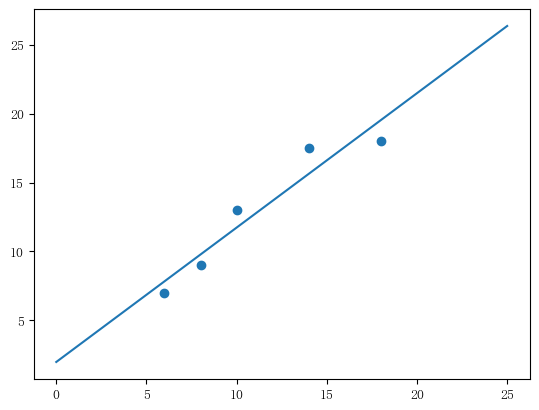

In [43]:
#画出拟合曲线
xx = np.linspace(0,25,100)
xx = xx.reshape(-1,1)#变成一维
yy = regressor.predict(xx)
plt.scatter(x_train,y_train)
plt.plot(xx,yy)

- 建立二次多项式线性回归模型进行预测
  - 根据二次多项式公式可知，需要给原始特征添加更高次的特征数据x^2.
    - $y=w_1x^2+w_2x+b $
- 如何给样本添加高次的特征数据呢？
  - 使用sklearn.preprocessing.PolynomialFeatures来进行更高次特征的构造
     - 它是使用多项式的方法来进行的，如果有a，b两个特征，那么它的2次多项式为（1,a,b,$a^2$,ab, $b^2$）
     - PolynomialFeatures有三个参数
       - degree：控制多项式的度
       - interaction_only： 默认为False，如果指定为True，上面的二次项中没有$a^2$和$b^2$。
       - include_bias：默认为True。如果为False的话，那么就不会有上面的1那一项

In [44]:
#PloynomialFeatures基本使用
from sklearn.preprocessing import PolynomialFeatures
c = [[5,10]]
p1 = PolynomialFeatures()
b = p1.fit_transform(c)
b

array([[  1.,   5.,  10.,  25.,  50., 100.]])

In [46]:
#建立二次多项式线性回归模型进行预测
poly2 = PolynomialFeatures(degree = 2)#二次多项式特征生成器
x_train_poly2 = poly2.fit_transform(x_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(x_train_poly2,y_train)



LinearRegression()

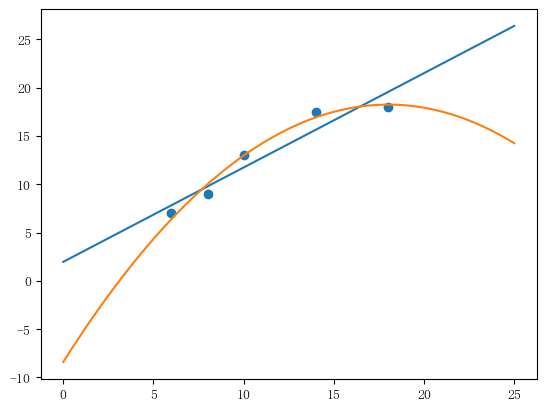

In [47]:
#画图
xx_poly2 = poly2.fit_transform(xx)
yy_poly2 = regressor_poly2.predict(xx_poly2)
plt.scatter(x_train,y_train)
plt.plot(xx,yy,label='Degree1')
plt.plot(xx,yy_poly2,label = 'Degree2')

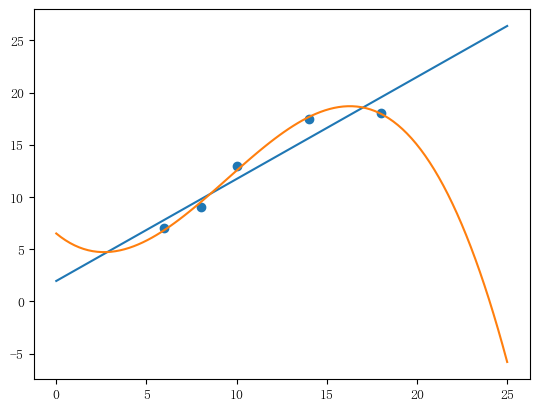

In [48]:
#建立二次多项式线性回归模型进行预测
poly3 = PolynomialFeatures(degree = 3)#二次多项式特征生成器
x_train_poly3 = poly3.fit_transform(x_train)
regressor_poly3 = LinearRegression()
regressor_poly3.fit(x_train_poly3,y_train)

#画图
xx_poly3 = poly3.fit_transform(xx)
yy_poly3 = regressor_poly3.predict(xx_poly3)
plt.scatter(x_train,y_train)
plt.plot(xx,yy,label='Degree1')
plt.plot(xx,yy_poly3,label = 'Degree3')

### 过拟合处理:L2正则化 
- 将过拟合的曲线的凹凸幅度减少就可以将过拟合曲线趋近于拟合曲线了。那么过拟合曲线的凹凸肯定是由$y=wx^2+x^3+x^4$中的高次项导致的那么L2正则化就是通过将高次项的特征的权重w调小到趋近于0，则高次项的特征就几乎没有了，那么凹凸幅度就会减少，就越趋近于拟合曲线了！
- LinnerRegression是没有办法进行正则化的，所以该算法模型容易出现过拟合，并且无法解决。
- L2正则化：
  - 使用带有正则化算法的回归模型（Ridge岭回归）处理过拟合的问题。
  
### Ridge岭回归模型:具备L2正则化的线性回归模型
- API:from sklearn.linear_model import Ridge
- Ridge(alpha=1.0):
  - alpha:正则化的力度，力度越大，则表示高次项的权重w越接近于0，导致过拟合曲线的凹凸幅度越小。
    - 取值：0-1小数或者1-10整数
  - coef_:回归系数


In [49]:

poly3 = PolynomialFeatures(degree=3)
x_train_poly3 = poly3.fit_transform(x_train)
regressor_poly3 = LinearRegression()
regressor_poly3.fit(x_train_poly3,y_train)
regressor_poly3.coef_

array([[ 0.        , -1.42626096,  0.31320489, -0.01103344]])

- 使用岭回归可以通过控制正则化力度参数alpha降低高次项特征的权重

In [50]:
from sklearn.linear_model import Ridge
poly3 = PolynomialFeatures(degree=3)
x_train_poly3 = poly3.fit_transform(x_train)
regressor_poly3 = Ridge(alpha=0.5)
regressor_poly3.fit(x_train_poly3,y_train)
regressor_poly3.coef_

array([[ 0.        , -0.14579637,  0.19991159, -0.00792083]])

- 岭回归的优点：
  - 获取的回归系数更符合实际更可靠
  - 在病态数据（异常值多的数据）偏多的研究中有更大的存在意义

### 模型的保存和加载
- 方式一 (推荐使用方式一，更加便捷)
  - from sklearn.externals import joblib
  - joblib.dump(model,'xxx.m'):保存
  - joblib.load('xxx.m'):加载
- 方式二
  - import pickle
  - with open('./123.pkl','wb') as fp:
  - pickle.dump(linner,fp)
  - with open('./123.pkl','rb') as fp:
  - linner = pickle.load(fp)

In [52]:
from sklearn.externals import joblib
joblib.dump(linear,'./datasets/123.m')

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\application\anoconda\Lib\site-packages\sklearn\externals\__init__.py)